<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 117.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 123.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 98.0 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


/tmp/ipykernel_300/4205470144.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="viridis")


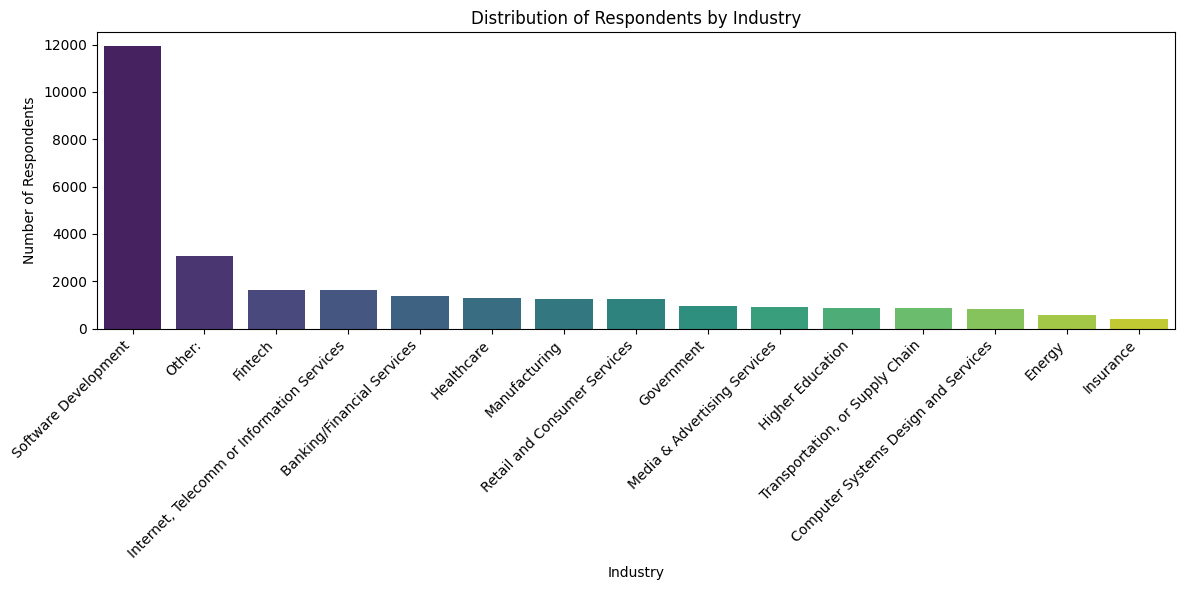

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Inspect the columns to find industry-related column
print(df.columns)

# Assuming the industry column is named "Industry"
# If the actual column name is different, replace "Industry" below with the correct name.
industry_col = "Industry"

# Get count of each industry
industry_counts = df[industry_col].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.index, y=industry_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Respondents by Industry")
plt.xlabel("Industry")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
import pandas as pd

# Load the dataset
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the top few columns to verify the correct column name
print(df.columns)

# Assuming the yearly compensation column is named "ConvertedCompYearly"
comp_col = "ConvertedCompYearly"

# Drop missing values for compensation
comp_data = df[comp_col].dropna()

# Basic Statistics
mean_comp = comp_data.mean()
median_comp = comp_data.median()
std_comp = comp_data.std()

print("Mean Compensation:", mean_comp)
print("Median Compensation:", median_comp)
print("Standard Deviation:", std_comp)

# Define threshold for high outliers (3 standard deviations above mean)
threshold = mean_comp + 3 * std_comp
print("Outlier Threshold (3 std above mean):", threshold)

# Identify high compensation outliers
high_outliers = df[df[comp_col] > threshold]

print("Number of High Compensation Outliers:", high_outliers.shape[0])
print(high_outliers[[comp_col]].head())

# Optional: Display full records of high outliers
high_outliers


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
Mean Compensation: 86155.28726264134
Median Compensation: 65000.0
Standard Deviation: 186756.97308629754
Outlier Threshold (3 std above mean): 646426.206521534
Number of High Compensation Outliers: 89
      ConvertedCompYearly
529              650000.0
828             1000000.0
1932             945000.0
2171             750000.0
2187            2000000.0


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
529,530,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,...,40.0,20.0,0.0,30.0,10.0,0.0,Appropriate in length,Easy,650000.0,6.0
828,829,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Bootstrapping a business;Professional de...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,30.0,10.0,0.0,5.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,1000000.0,8.0
1932,1933,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Books;Written Tu...,...,15.0,10.0,15.0,15.0,0.0,15.0,Appropriate in length,Easy,945000.0,2.0
2171,2172,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,20.0,10.0,20.0,25.0,0.0,0.0,Appropriate in length,Easy,750000.0,8.0
2187,2188,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Written Tutorials;Stac...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,2000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38219,38220,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Boots...,Some college/university study without earning ...,On the job training;Other online resources (e....,Books;Written Tutorials;Interactive tutorial;V...,...,0.0,0.0,0.0,0.0,0.0,0.0,Too long,NaN,1000000.0,10.0
39643,39644,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,1300000.0,NaN
40066,40067,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Boots...,Some college/university study without earning ...,Other (please specify):,NaN,...,20.0,0.0,20.0,0.0,0.0,10.0,Appropriate in length,Easy,800000.0,10.0
40952,40953,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby,Some college/university study without earning ...,Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Stack Overflow,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,750000.0,NaN


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1: 32712.0
Q3: 107971.5
IQR: 75259.5
Lower Bound: -80177.25
Upper Bound: 220860.75
Number of Outliers: 978
     ConvertedCompYearly
428             230000.0
456             300000.0
461             254425.0
529             650000.0
545             400000.0


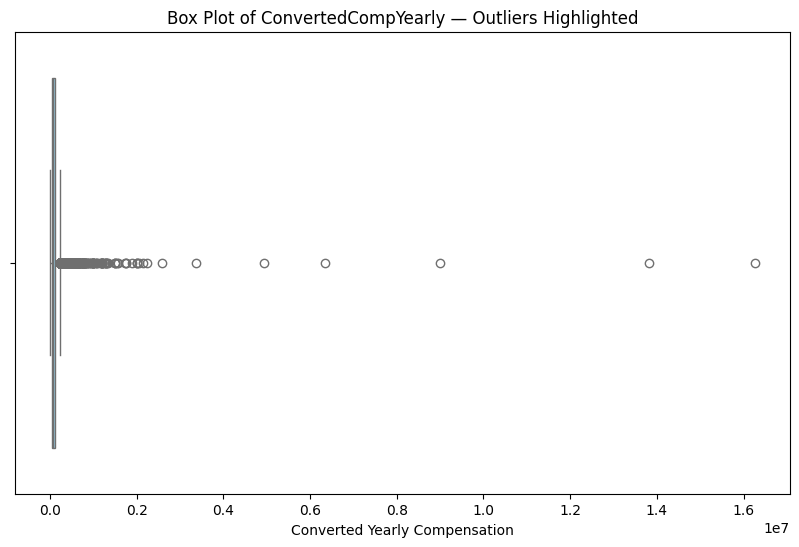

In [6]:
# Use the compensation column
comp_col = "ConvertedCompYearly"

# Drop missing values
comp_data = df[comp_col].dropna()

# Calculate Q1 (25th percentile), Q3 (75th percentile) and IQR
Q1 = comp_data.quantile(0.25)
Q3 = comp_data.quantile(0.75)
IQR = Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

# Determine bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# Identify outliers
outliers = df[(df[comp_col] < lower_bound) | (df[comp_col] > upper_bound)]

print("Number of Outliers:", outliers.shape[0])
print(outliers[[comp_col]].head())

# Visualize with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=comp_data, color='skyblue')
plt.title('Box Plot of ConvertedCompYearly — Outliers Highlighted')
plt.xlabel('Converted Yearly Compensation')
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [7]:
# Select the compensation column
comp_col = "ConvertedCompYearly"

# Drop rows where compensation is missing
df_clean = df.dropna(subset=[comp_col])

# Calculate IQR for ConvertedCompYearly
Q1 = df_clean[comp_col].quantile(0.25)
Q3 = df_clean[comp_col].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows outside of bounds (remove outliers)
df_no_outliers = df_clean[
    (df_clean[comp_col] >= lower_bound) &
    (df_clean[comp_col] <= upper_bound)
]

# Validate the size of the new DataFrame
print("Original DataFrame size:", df_clean.shape)
print("New DataFrame size (without outliers):", df_no_outliers.shape)


Original DataFrame size: (23435, 114)
New DataFrame size (without outliers): (22457, 114)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [8]:
# Example mapping (use actual categories from your dataset)
age_mapping = {
    'Under 18 years old': 15,
    '18 - 24 years old': 21,
    '25 - 34 years old': 30,
    '35 - 44 years old': 40,
    '45 - 54 years old': 50,
    '55 - 64 years old': 60,
    '65 years or older': 70
}

df['AgeNumeric'] = df['Age'].map(age_mapping)

#Map Age Categories to Numeric Values

In [9]:
#Select Numeric Columns and Compute Correlation
#Once Age is transformed, gather all numeric columns (including the new AgeNumeric) and compute the correlation matrix:

# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

print(correlation_matrix)
#This computes Pearson correlation between every pair of numeric variables.

                     ResponseId  CompTotal   WorkExp  JobSatPoints_1  \
ResponseId             1.000000  -0.000000  0.011955       -0.002406   
CompTotal             -0.000000   0.000000  0.028766       -0.004891   
WorkExp                0.011955   0.028766  1.000000       -0.026490   
JobSatPoints_1        -0.002406  -0.004891 -0.026490        1.000000   
JobSatPoints_4        -0.015738  -0.002719 -0.067241        0.445710   
JobSatPoints_5        -0.014197  -0.003033 -0.104525        0.633765   
JobSatPoints_6        -0.001908  -0.006311 -0.065352        0.618618   
JobSatPoints_7         0.001843  -0.005893 -0.101461        0.603157   
JobSatPoints_8        -0.002968  -0.004585 -0.046958        0.627385   
JobSatPoints_9         0.001991  -0.004494 -0.088090        0.597527   
JobSatPoints_10       -0.005365  -0.003198 -0.113707        0.585087   
JobSatPoints_11       -0.005865  -0.003045 -0.108279        0.607792   
ConvertedCompYearly   -0.008363   0.080457  0.154114        0.02

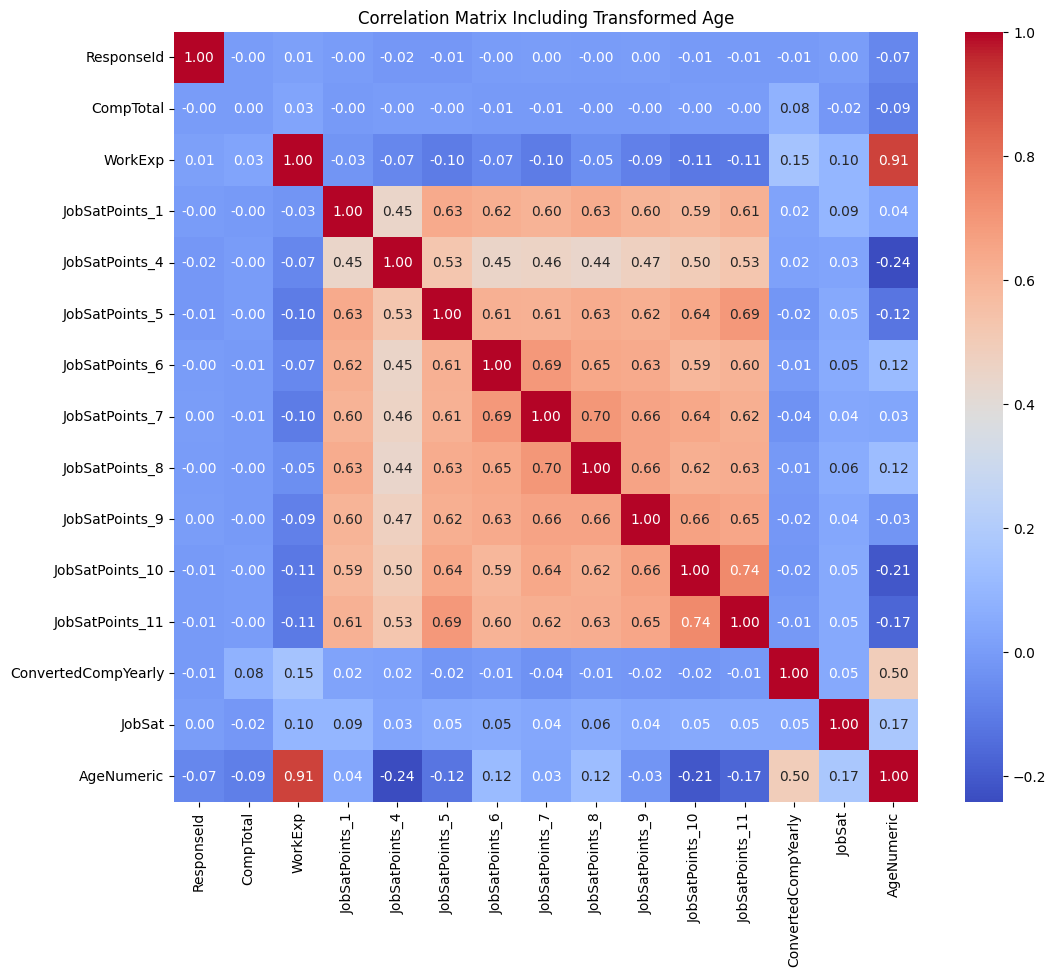

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Including Transformed Age')
plt.show()

#Visualize the Correlation Matrix
#To visualize the correlations, use a heatmap, which gives a color-coded view of how strongly variables are linearly related:

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
